In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import pickle

# **Unbalanced Dataset**

In [2]:
data = pd.read_csv('/content/survey lung cancer.csv')
# data = pd.read_csv('/content/drive/MyDrive/Lung Cancer/survey lung cancer.csv')

In [3]:
# Displaying some of the first rows
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Displaying the column names of the DataFrame
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# Generating descriptive statistics for the DataFrame
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
# Checking for missing values in the DataFrame
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

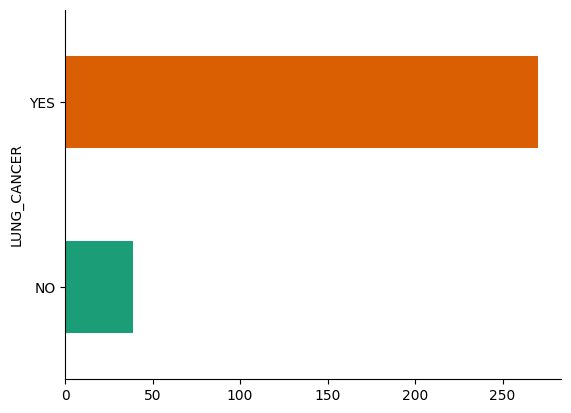

In [8]:
# Plotting the count of individuals with and without lung cancer
data.groupby('LUNG_CANCER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

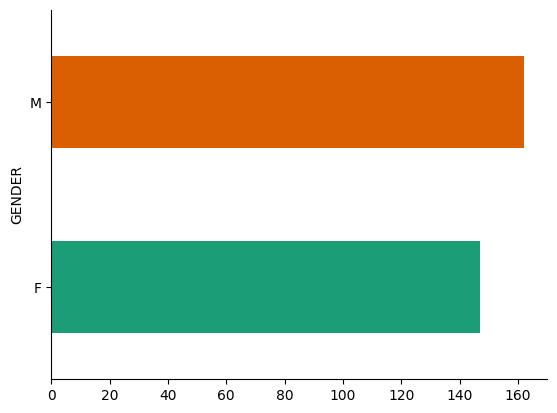

In [9]:
# Plotting the count of individuals by gender
data.groupby('GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

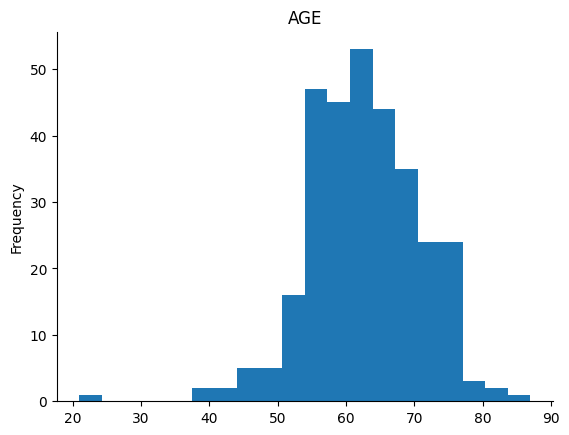

In [10]:
# Plotting a histogram of ages
data['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# Printing unique values in each column of the DataFrame
for column in data.columns:
    print(f"Unique values in column '{column}': {data[column].unique()}")

Unique values in column 'GENDER': ['M' 'F']
Unique values in column 'AGE': [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in column 'SMOKING': [1 2]
Unique values in column 'YELLOW_FINGERS': [2 1]
Unique values in column 'ANXIETY': [2 1]
Unique values in column 'PEER_PRESSURE': [1 2]
Unique values in column 'CHRONIC DISEASE': [1 2]
Unique values in column 'FATIGUE ': [2 1]
Unique values in column 'ALLERGY ': [1 2]
Unique values in column 'WHEEZING': [2 1]
Unique values in column 'ALCOHOL CONSUMING': [2 1]
Unique values in column 'COUGHING': [2 1]
Unique values in column 'SHORTNESS OF BREATH': [2 1]
Unique values in column 'SWALLOWING DIFFICULTY': [2 1]
Unique values in column 'CHEST PAIN': [2 1]
Unique values in column 'LUNG_CANCER': ['YES' 'NO']


In [12]:
# Map categorical variables to numerical values
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0}).astype(int)
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0}).astype(int)

In [13]:
# Check for missing or unexpected values in 'GENDER' column
print("Unique values in 'GENDER' column:", data['GENDER'].unique())

Unique values in 'GENDER' column: [1 0]


In [14]:
# Check for missing or unexpected values in 'Lung_cancer' column
print("Unique values in 'lUNG_CANCER' column:", data['LUNG_CANCER'].unique())

Unique values in 'lUNG_CANCER' column: [1 0]


<Axes: >

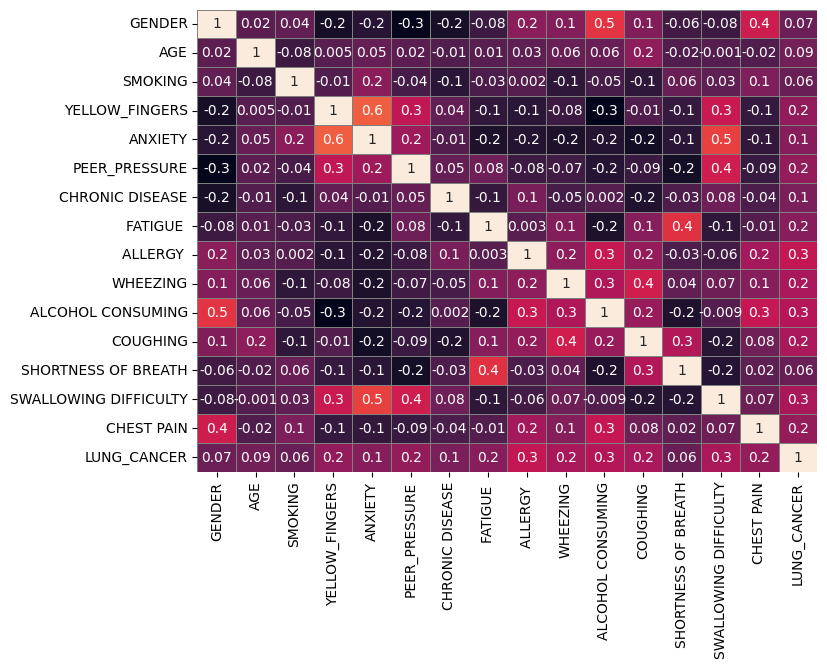

In [15]:
# Create a heatmap to visualize the correlation matrix of the data
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

In [16]:
# Display the first few rows of the modified dataframe
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
# Calculate the mean age grouped by the presence of lung cancer
data.groupby('LUNG_CANCER')['AGE'].mean()

LUNG_CANCER
0    60.743590
1    62.951852
Name: AGE, dtype: float64

In [18]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns='LUNG_CANCER')
y = data['LUNG_CANCER'].values

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("The Accuracy of The Random Forest Model is {:.2f}".format(rf_accuracy))

The Accuracy of The Random Forest Model is 0.93


In [21]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=43)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("The Accuracy of The Logistic Regression Model is {:.2f}".format(lr_accuracy))

The Accuracy of The Logistic Regression Model is 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("The Accuracy of The Decision Tree Model is {:.2f}".format(dt_accuracy))

The Accuracy of The Decision Tree Model is 0.91


In [23]:
# Initialize GradientBoostingClassifier For classification
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=42)
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("The Accuracy of The Gradient Boosting Classifier is {:.2f}".format(gbc_accuracy))

The Accuracy of The Gradient Boosting Classifier is 0.92


In [24]:
# Initialize Support Vector Machine model
"""
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("The Accuracy of The Support Vector Machine is {:.2f}".format(svm_accuracy))
"""

'\nsvm_model = SVC(probability=True)\nsvm_model.fit(X_train, y_train)\nsvm_pred = svm_model.predict(X_test)\nsvm_accuracy = accuracy_score(y_test, svm_pred)\nprint("The Accuracy of The Support Vector Machine is {:.2f}".format(svm_accuracy))\n'

In [25]:
#finding mean square error for the above models
rf_mse = mean_squared_error(y_test, rf_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
gbc_mse = mean_squared_error(y_test, gbc_pred)
#svm_mse = mean_squared_error(y_test, svm_pred)

print("The mse of The Random Forest Model for random_state=42 is {:.2f}".format(rf_mse))
print("The mse of The logisitic regression Model is {:.2f}".format(lr_mse))
print("The mse of The decision tree Model is {:.2f}".format(dt_mse))
print("The mse of The gradient boosting classifier is {:.2f}".format(gbc_mse))
#print("The mse of The support vector machine Model is {:.2f}".format(svm_mse))

The mse of The Random Forest Model for random_state=42 is 0.07
The mse of The logisitic regression Model is 0.06
The mse of The decision tree Model is 0.09
The mse of The gradient boosting classifier is 0.08


In [26]:
#finding mean square error for the above models
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(y_test, rf_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
#svm_mse = mean_squared_error(y_test, svm_pred)

print("The mse of The Random Forest Model for random_state=26 is {:.2f}".format(rf_mse))
print("The mse of The logisitic regression Model is {:.2f}".format(lr_mse))
print("The mse of The decision tree Model is {:.2f}".format(dt_mse))
#print("The mse of The support vector machine Model is {:.2f}".format(svm_mse))

The mse of The Random Forest Model for random_state=26 is 0.07
The mse of The logisitic regression Model is 0.06
The mse of The decision tree Model is 0.09


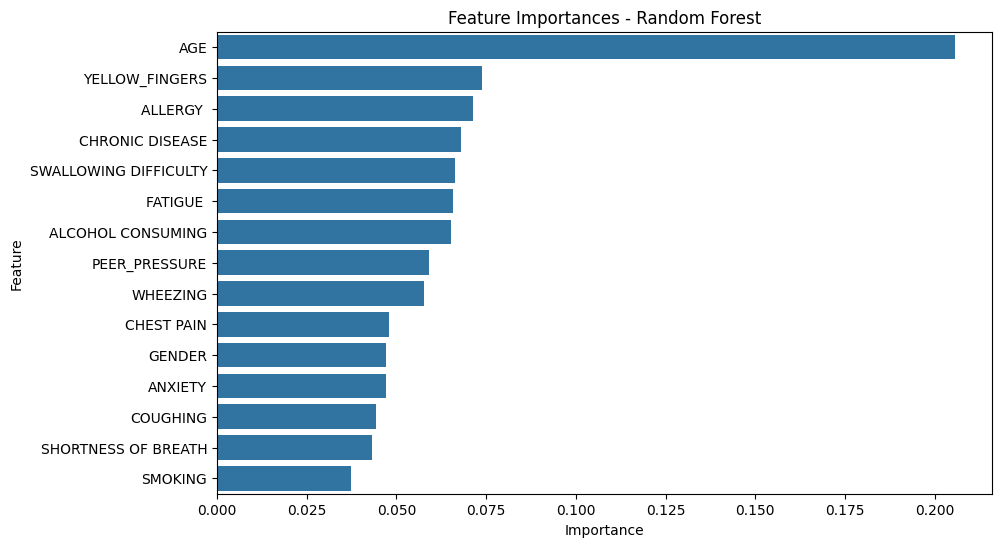

In [27]:
# Get feature importances
feature_importances_rf = rf_model.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_features_rf = X.columns[sorted_indices_rf]
sorted_importances_rf = feature_importances_rf[sorted_indices_rf]

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

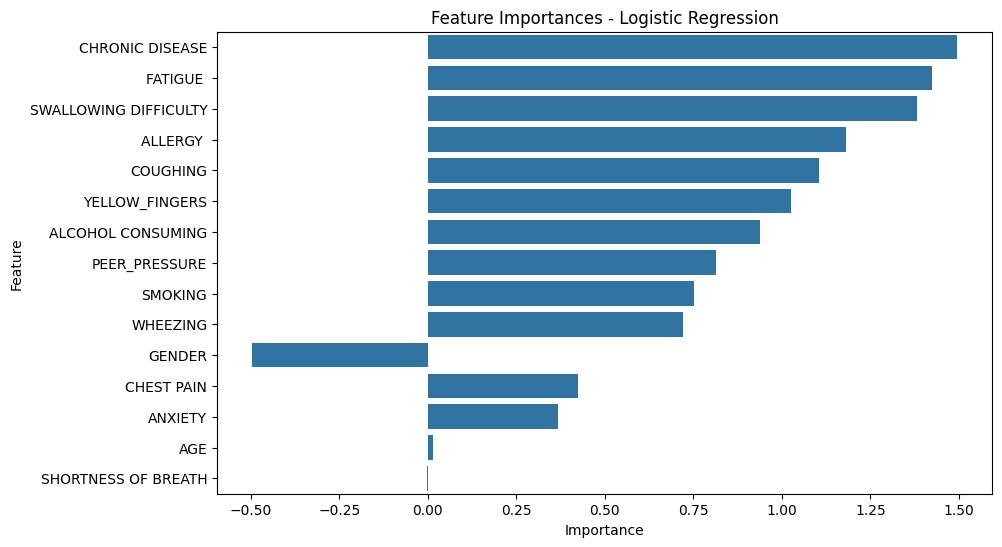

In [28]:
# Get feature importances for Logistic Regression (coefficients)
feature_importances_lr = lr_model.coef_[0]
sorted_indices_lr = np.argsort(abs(feature_importances_lr))[::-1]
sorted_features_lr = X.columns[sorted_indices_lr]
sorted_importances_lr = feature_importances_lr[sorted_indices_lr]

# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_lr, y=sorted_features_lr)
plt.title('Feature Importances - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

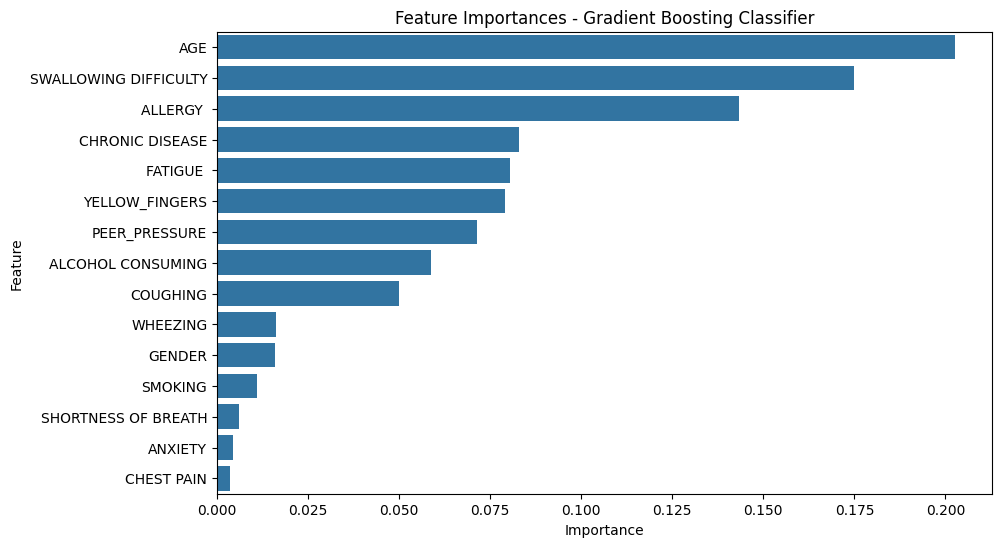

In [29]:
# Get feature importances for Gradient Boosting Classifier
feature_importances_gbc = gbc_model.feature_importances_
sorted_indices_gbc = np.argsort(feature_importances_gbc)[::-1]
sorted_features_gbc = X.columns[sorted_indices_gbc]
sorted_importances_gbc = feature_importances_gbc[sorted_indices_gbc]

# Plot feature importances for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_gbc, y=sorted_features_gbc)
plt.title('Feature Importances - Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

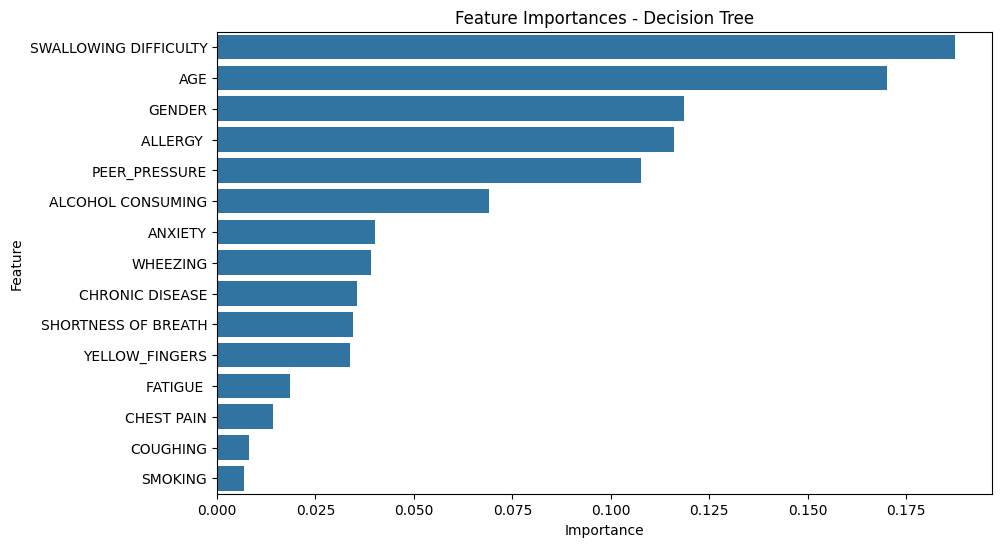

In [30]:
# Get feature importances for Decision Tree
feature_importances_dt = dt_model.feature_importances_
sorted_indices_dt = np.argsort(feature_importances_dt)[::-1]
sorted_features_dt = X.columns[sorted_indices_dt]
sorted_importances_dt = feature_importances_dt[sorted_indices_dt]

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_dt, y=sorted_features_dt)
plt.title('Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


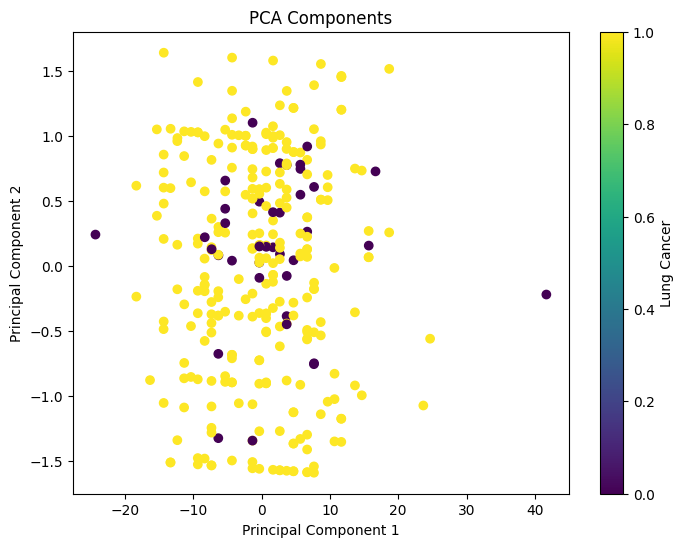

In [31]:
# Initialize PCA and fit-transform the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Lung Cancer')
plt.show()

In [32]:
# Classification Report  for each model
models = [
    ("Random Forest", rf_model),
    ("Logistic Regression", lr_model),
    ("decision Tree", dt_model),
    ("gradient boosting", gbc_model)
    #("support vector machine", svm_model)
]

for name, model in models:
    print(f"\n{name} Model:")
    print("Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.96      0.96      0.96       113

    accuracy                           0.93       124
   macro avg       0.78      0.76      0.77       124
weighted avg       0.92      0.93      0.93       124


Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.95      0.99      0.97       113

    accuracy                           0.94       124
   macro avg       0.89      0.72      0.78       124
weighted avg       0.94      0.94      0.94       124


decision Tree Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.96      0.95      0.95       113

    accuracy                           0.

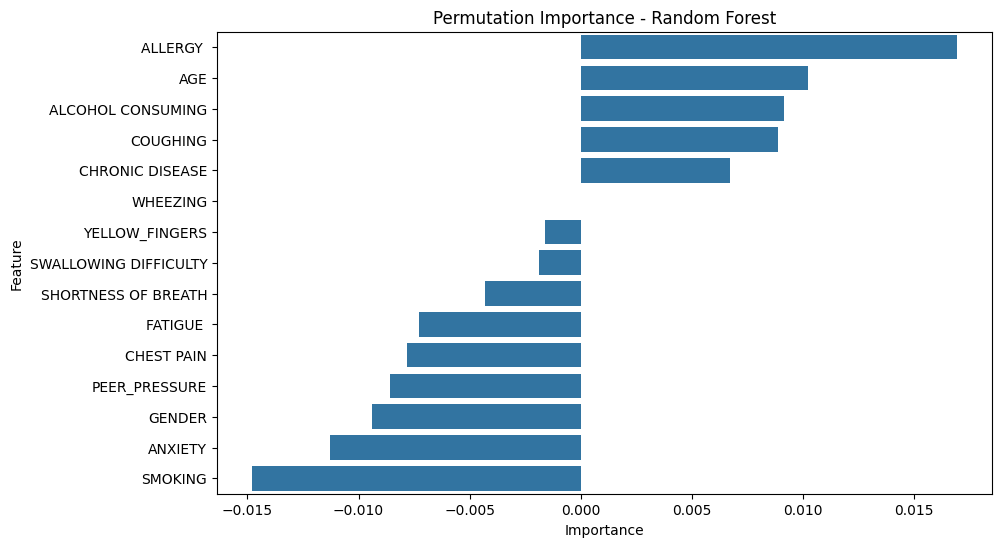

In [33]:
# Calculate permutation importance for Random Forest
rf_perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_rf_perm = np.argsort(rf_perm_importance.importances_mean)[::-1]
sorted_features_rf_perm = X.columns[sorted_indices_rf_perm]
sorted_importances_rf_perm = rf_perm_importance.importances_mean[sorted_indices_rf_perm]

# Plot permutation importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf_perm, y=sorted_features_rf_perm)
plt.title('Permutation Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

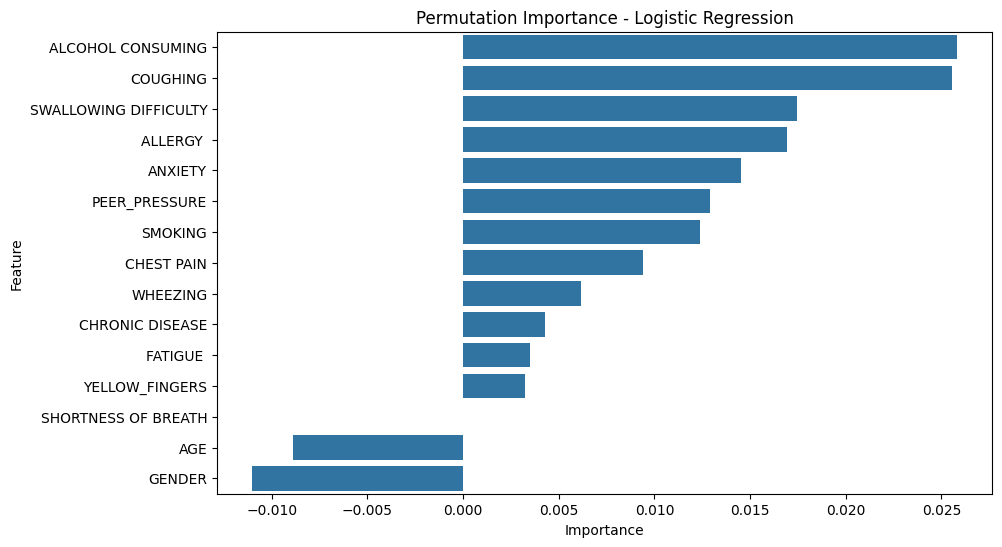

In [34]:
# Calculate permutation importance for Logistic Regression
lr_perm_importance = permutation_importance(lr_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_lr_perm = np.argsort(lr_perm_importance.importances_mean)[::-1]
sorted_features_lr_perm = X.columns[sorted_indices_lr_perm]
sorted_importances_lr_perm = lr_perm_importance.importances_mean[sorted_indices_lr_perm]

# Plot permutation importance for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_lr_perm, y=sorted_features_lr_perm)
plt.title('Permutation Importance - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

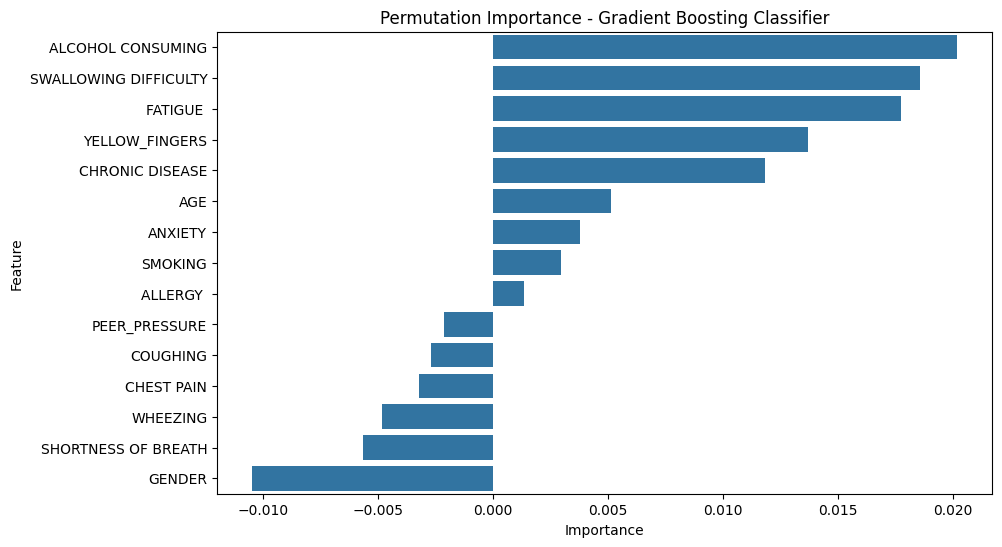

In [35]:
# Calculate permutation importance for Gradient Boosting Classifier
gbc_perm_importance = permutation_importance(gbc_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_gbc_perm = np.argsort(gbc_perm_importance.importances_mean)[::-1]
sorted_features_gbc_perm = X.columns[sorted_indices_gbc_perm]
sorted_importances_gbc_perm = gbc_perm_importance.importances_mean[sorted_indices_gbc_perm]

# Plot permutation importance for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_gbc_perm, y=sorted_features_gbc_perm)
plt.title('Permutation Importance - Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

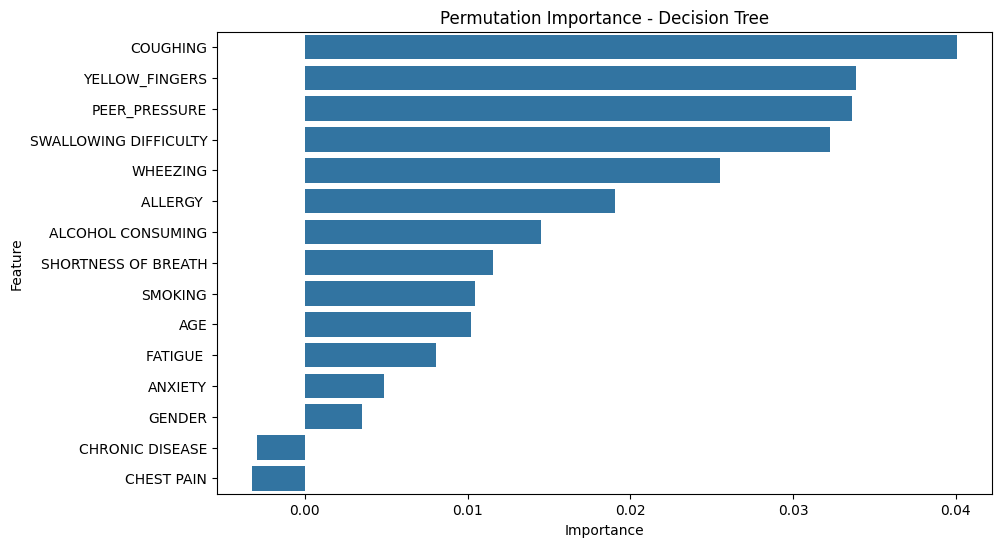

In [36]:
# Calculate permutation importance for Decision Tree
dt_perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_dt_perm = np.argsort(dt_perm_importance.importances_mean)[::-1]
sorted_features_dt_perm = X.columns[sorted_indices_dt_perm]
sorted_importances_dt_perm = dt_perm_importance.importances_mean[sorted_indices_dt_perm]

# Plot permutation importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_dt_perm, y=sorted_features_dt_perm)
plt.title('Permutation Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [37]:
# Confusion Matrices for all four models
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test))
gbc_cm = confusion_matrix(y_test, gbc_model.predict(X_test))
#svm_cm = confusion_matrix(y_test, svm_model.predict(X_test))
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))

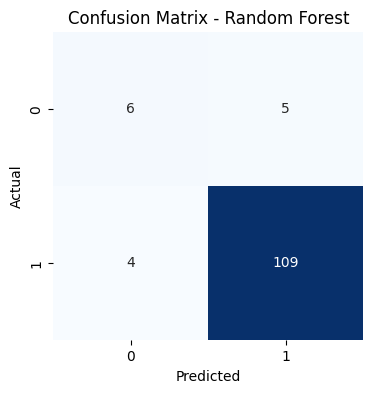

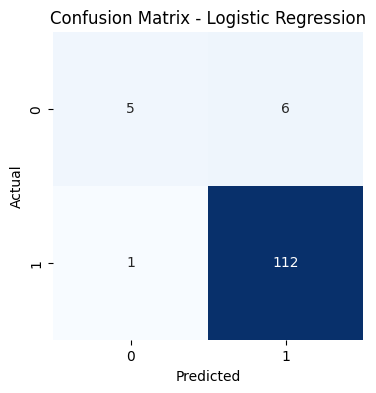

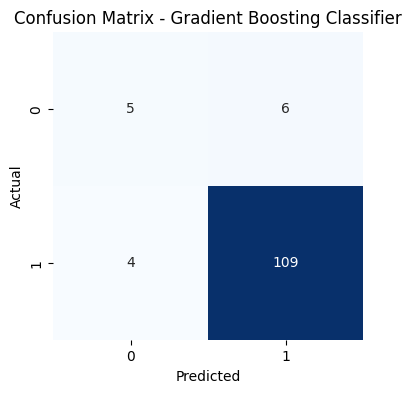

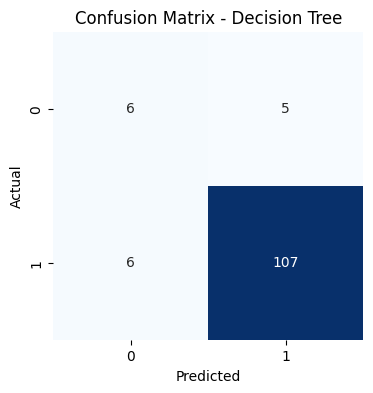

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all four models
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(lr_cm, 'Logistic Regression')
plot_confusion_matrix(gbc_cm, 'Gradient Boosting Classifier')
plot_confusion_matrix(dt_cm, 'Decision Tree')


In [39]:
"""# Plot Confusion Matrices
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', ax=ax[0, 0])
ax[0, 0].set_title('Random Forest Confusion Matrix')
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', ax=ax[0, 1])
ax[0, 1].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(gbc_cm, annot=True, cmap='Blues', fmt='d', ax=ax[1, 0])
ax[1, 0].set_title('Gradient Boosting Classifier Confusion Matrix')
#sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='d', ax=ax[2, 0])
#ax[2, 0].set_title('Support Vector Machine Confusion Matrix')
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', ax=ax[1, 1])
ax[1, 1].set_title('Decision Tree Confusion Matrix')
"""

plt.show()

In [40]:
# Calculate False Negatives Percentage for all models
false_negatives_rf = rf_cm[1, 0]  # Random Forest
total_actual_positives_rf = rf_cm[1, 0] + rf_cm[1, 1]

false_negatives_lr = lr_cm[1, 0]  # Logistic Regression
total_actual_positives_lr = lr_cm[1, 0] + lr_cm[1, 1]

#false_negatives_svm = svm_cm[1, 0]  # Support Vector Machine
#total_actual_positives_svm = svm_cm[1, 0] + svm_cm[1, 1]

false_negatives_dt = dt_cm[1, 0]  # decision tree
total_actual_positives_dt = dt_cm[1, 0] + dt_cm[1, 1]

false_negatives_gbc = gbc_cm[1, 0]  # decision tree
total_actual_positives_gbc = gbc_cm[1, 0] + gbc_cm[1, 1]

false_negatives_percentage_rf = (false_negatives_rf / total_actual_positives_rf) * 100
false_negatives_percentage_lr = (false_negatives_lr / total_actual_positives_lr) * 100
false_negatives_percentage_gbc = (false_negatives_gbc / total_actual_positives_gbc) * 100
false_negatives_percentage_dt = (false_negatives_dt / total_actual_positives_dt) * 100

In [41]:
print(f"False Negatives Percentage for Random Forest: {false_negatives_percentage_rf:.2f}%")
print(f"False Negatives Percentage for Logistic Regression: {false_negatives_percentage_lr:.2f}%")
print(f"False Negatives Percentage for gradient boosting: {false_negatives_percentage_gbc:.2f}%")
print(f"False Negatives Percentage for Decision Tree: {false_negatives_percentage_dt:.2f}%")

False Negatives Percentage for Random Forest: 3.54%
False Negatives Percentage for Logistic Regression: 0.88%
False Negatives Percentage for gradient boosting: 3.54%
False Negatives Percentage for Decision Tree: 5.31%


In [42]:
# Save the trained logistic regression model to a file
with open('lung_cancer_lr_unbalanced.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# **Balancing The Dataset**

In [43]:
# Read the original data
import pandas as pd
data = pd.read_csv('/content/survey lung cancer.csv')

# Separate instances with 'yes' and 'no' labels
yes_instances = data[data['LUNG_CANCER'] == 'YES']
no_instances = data[data['LUNG_CANCER'] == 'NO']

if len(yes_instances) >= 50:  # Check if there are at least 50 instances of 'yes'
    selected_yes_instances = yes_instances.sample(n=50, random_state=42)
else:
    selected_yes_instances = yes_instances

# Combine selected 'yes' instances with all 'no' instances
balanced_data = pd.concat([selected_yes_instances, no_instances])

# Shuffle the data to mix 'yes' and 'no' instances
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now you have a balanced dataset with approximately 50-60 instances of 'yes' and 50 instances of 'no'
print(balanced_data['LUNG_CANCER'].value_counts())

# Save the balanced data to a CSV file
balanced_data.to_csv('modified.csv', index=False)

LUNG_CANCER
YES    50
NO     39
Name: count, dtype: int64


# **Balanced Dataset**

In [44]:
data = pd.read_csv('/content/modified.csv')
# Displaying some of the first rows
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,48,2,1,1,1,2,2,2,1,2,2,2,2,2,YES
1,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
2,F,61,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
3,M,64,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
4,M,62,1,2,2,2,1,2,1,1,1,1,1,2,2,YES


In [45]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 89 non-null     object
 1   AGE                    89 non-null     int64 
 2   SMOKING                89 non-null     int64 
 3   YELLOW_FINGERS         89 non-null     int64 
 4   ANXIETY                89 non-null     int64 
 5   PEER_PRESSURE          89 non-null     int64 
 6   CHRONIC DISEASE        89 non-null     int64 
 7   FATIGUE                89 non-null     int64 
 8   ALLERGY                89 non-null     int64 
 9   WHEEZING               89 non-null     int64 
 10  ALCOHOL CONSUMING      89 non-null     int64 
 11  COUGHING               89 non-null     int64 
 12  SHORTNESS OF BREATH    89 non-null     int64 
 13  SWALLOWING DIFFICULTY  89 non-null     int64 
 14  CHEST PAIN             89 non-null     int64 
 15  LUNG_CANCER            89

In [46]:
# Displaying the column names of the DataFrame
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [47]:
# Generating descriptive statistics for the DataFrame
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,61.808989,1.528090,1.483146,1.426966,1.359551,1.471910,1.58427,1.449438,1.505618,1.438202,1.550562,1.617978,1.359551,1.561798
std,8.439459,0.502039,0.502547,0.497440,0.482588,0.502039,0.49564,0.500255,0.502801,0.498978,0.500255,0.488635,0.482588,0.498978
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,61.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [48]:
# Checking for missing values in the DataFrame
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

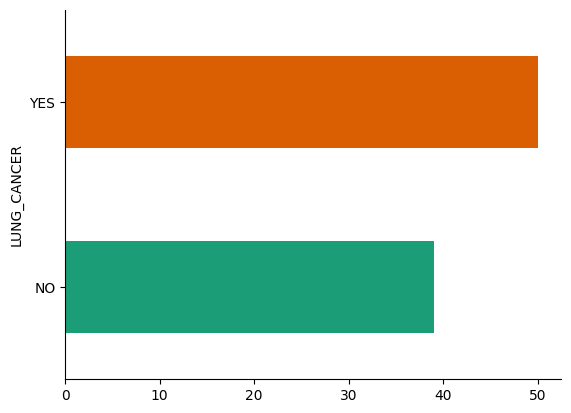

In [49]:
# Plotting the count of individuals with and without lung cancer
data.groupby('LUNG_CANCER').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

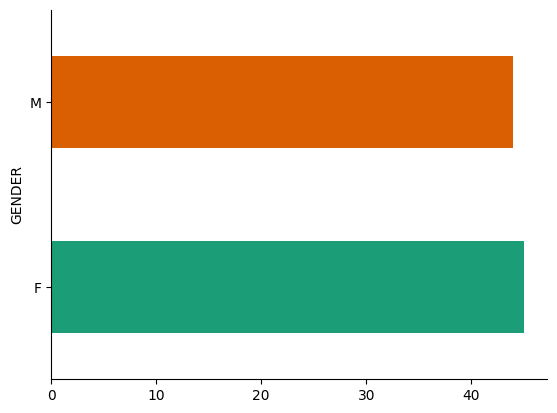

In [50]:
# Plotting the count of individuals by gender
data.groupby('GENDER').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

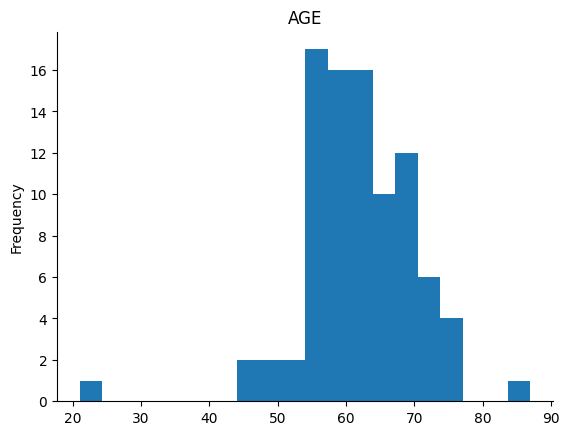

In [51]:
# Plotting a histogram of ages
data['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
# Printing unique values in each column of the DataFrame
for column in data.columns:
    print(f"Unique values in column '{column}': {data[column].unique()}")

Unique values in column 'GENDER': ['M' 'F']
Unique values in column 'AGE': [48 68 61 64 62 70 60 55 74 59 67 56 63 51 58 71 69 76 57 77 65 47 54 53
 46 21 87 73]
Unique values in column 'SMOKING': [2 1]
Unique values in column 'YELLOW_FINGERS': [1 2]
Unique values in column 'ANXIETY': [1 2]
Unique values in column 'PEER_PRESSURE': [1 2]
Unique values in column 'CHRONIC DISEASE': [2 1]
Unique values in column 'FATIGUE ': [2 1]
Unique values in column 'ALLERGY ': [2 1]
Unique values in column 'WHEEZING': [1 2]
Unique values in column 'ALCOHOL CONSUMING': [2 1]
Unique values in column 'COUGHING': [2 1]
Unique values in column 'SHORTNESS OF BREATH': [2 1]
Unique values in column 'SWALLOWING DIFFICULTY': [2 1]
Unique values in column 'CHEST PAIN': [2 1]
Unique values in column 'LUNG_CANCER': ['YES' 'NO']


In [53]:
# Map categorical variables to numerical values
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0}).astype(int)
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0}).astype(int)

In [54]:
# Check for missing or unexpected values in 'GENDER' column
print("Unique values in 'GENDER' column:", data['GENDER'].unique())

Unique values in 'GENDER' column: [1 0]


In [55]:
# Check for missing or unexpected values in 'Lung_cancer' column
print("Unique values in 'LUNG_CANCER' column:", data['LUNG_CANCER'].unique())

Unique values in 'LUNG_CANCER' column: [1 0]


<Axes: >

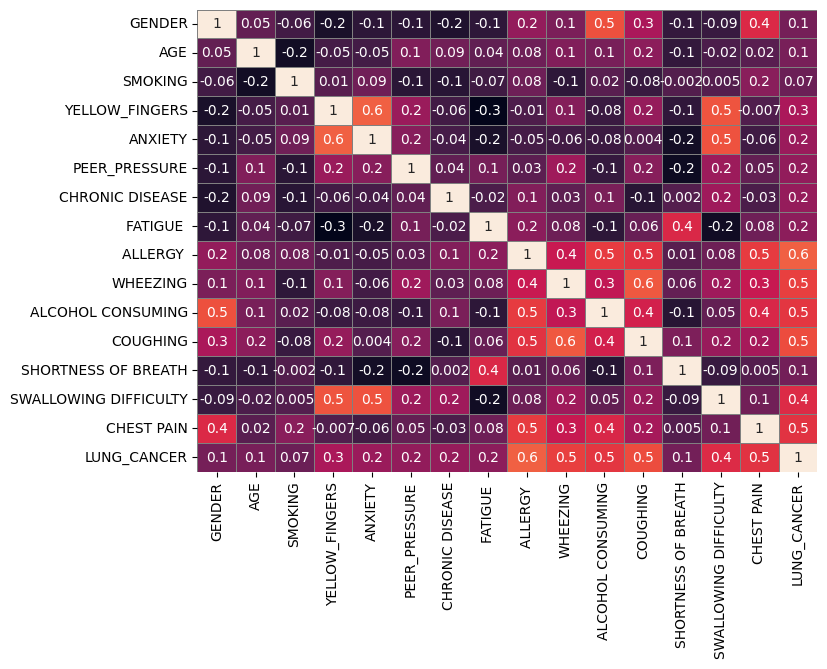

In [56]:
# Create a heatmap to visualize the correlation matrix of the data
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

In [57]:
# Display the first few rows of the modified dataframe
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,48,2,1,1,1,2,2,2,1,2,2,2,2,2,1
1,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
2,0,61,1,2,2,2,1,1,2,2,1,2,1,2,1,1
3,1,64,2,1,1,1,1,1,2,2,2,2,1,1,2,1
4,1,62,1,2,2,2,1,2,1,1,1,1,1,2,2,1


In [58]:
# Calculate the mean age grouped by the presence of lung cancer
data.groupby('LUNG_CANCER')['AGE'].mean()

LUNG_CANCER
0    60.74359
1    62.64000
Name: AGE, dtype: float64

In [59]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns='LUNG_CANCER')
y = data['LUNG_CANCER'].values

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [61]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("The Accuracy of The Random Forest Model is {:.2f}".format(rf_accuracy))

The Accuracy of The Random Forest Model is 0.86


In [62]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("The Accuracy of The Logistic Regression Model is {:.2f}".format(lr_accuracy))

The Accuracy of The Logistic Regression Model is 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("The Accuracy of The Decision Tree Model is {:.2f}".format(dt_accuracy))

The Accuracy of The Decision Tree Model is 0.78


In [64]:
# Initialize Support Vector Machine model
"""
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("The Accuracy of The Support Vector Machine is {:.2f}".format(svm_accuracy))
"""

'\nsvm_model = SVC(probability=True)\nsvm_model.fit(X_train, y_train)\nsvm_pred = svm_model.predict(X_test)\nsvm_accuracy = accuracy_score(y_test, svm_pred)\nprint("The Accuracy of The Support Vector Machine is {:.2f}".format(svm_accuracy))\n'

In [65]:
# Initialize GradientBoostingClassifier For classification
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=42)
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("The Accuracy of The Gradient Boosting Classifier is {:.2f}".format(gbc_accuracy))

The Accuracy of The Gradient Boosting Classifier is 0.75


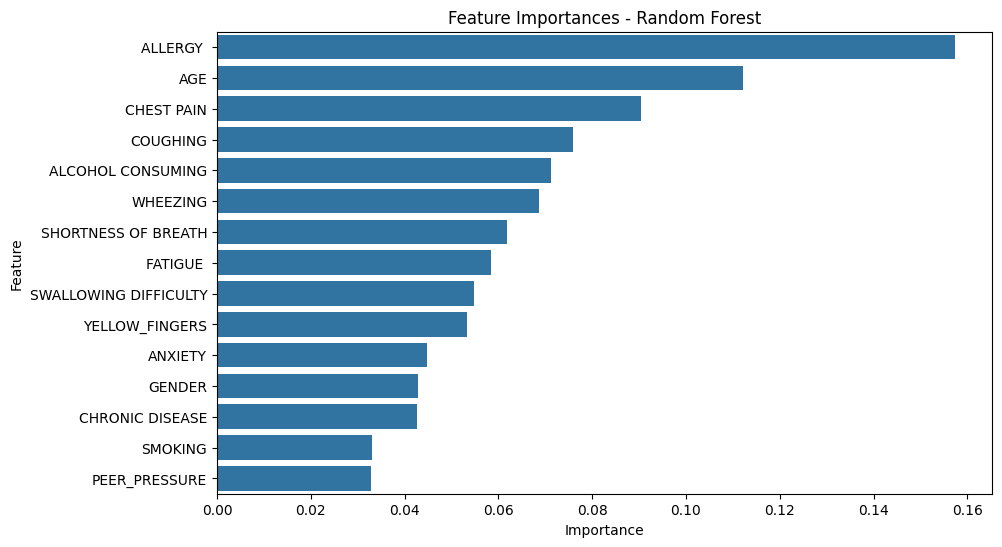

In [66]:
# Get feature importances
feature_importances_rf = rf_model.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_features_rf = X.columns[sorted_indices_rf]
sorted_importances_rf = feature_importances_rf[sorted_indices_rf]

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [67]:
# Get feature importances for Logistic Regression (coefficients)
feature_importances_lr = lr_model.coef_[0]
sorted_indices_lr = np.argsort(abs(feature_importances_lr))[::-1]
sorted_features_lr = X.columns[sorted_indices_lr]
sorted_importances_lr = feature_importances_lr[sorted_indices_lr]

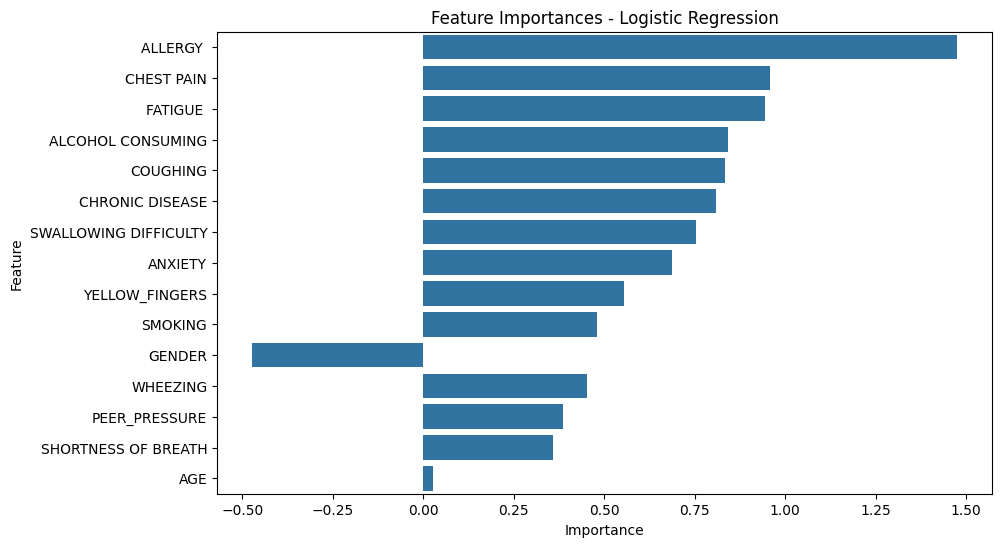

In [68]:
# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_lr, y=sorted_features_lr)
plt.title('Feature Importances - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
# Get feature importances for Gradient Boosting Classifier
feature_importances_gbc = gbc_model.feature_importances_
sorted_indices_gbc = np.argsort(feature_importances_gbc)[::-1]
sorted_features_gbc = X.columns[sorted_indices_gbc]
sorted_importances_gbc = feature_importances_gbc[sorted_indices_gbc]

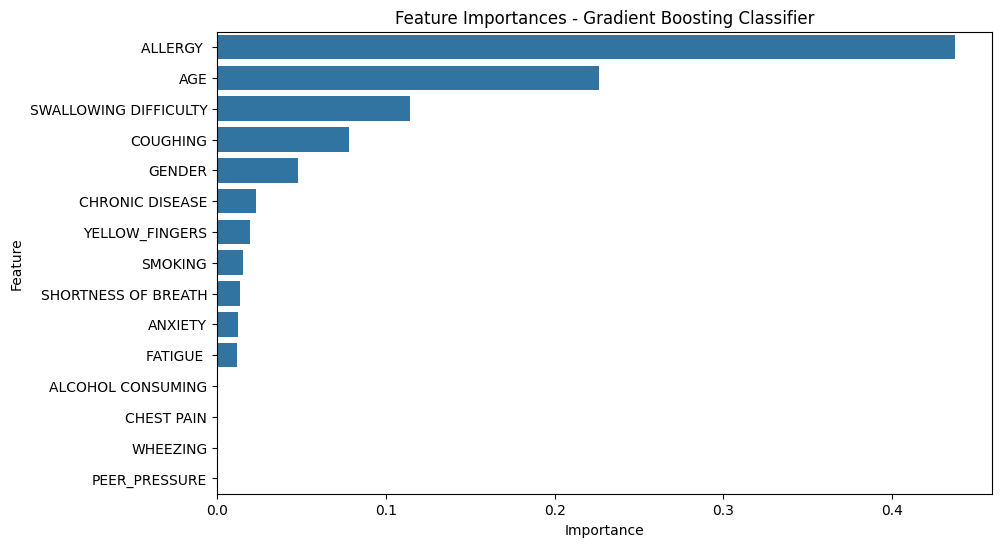

In [70]:
# Plot feature importances for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_gbc, y=sorted_features_gbc)
plt.title('Feature Importances - Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

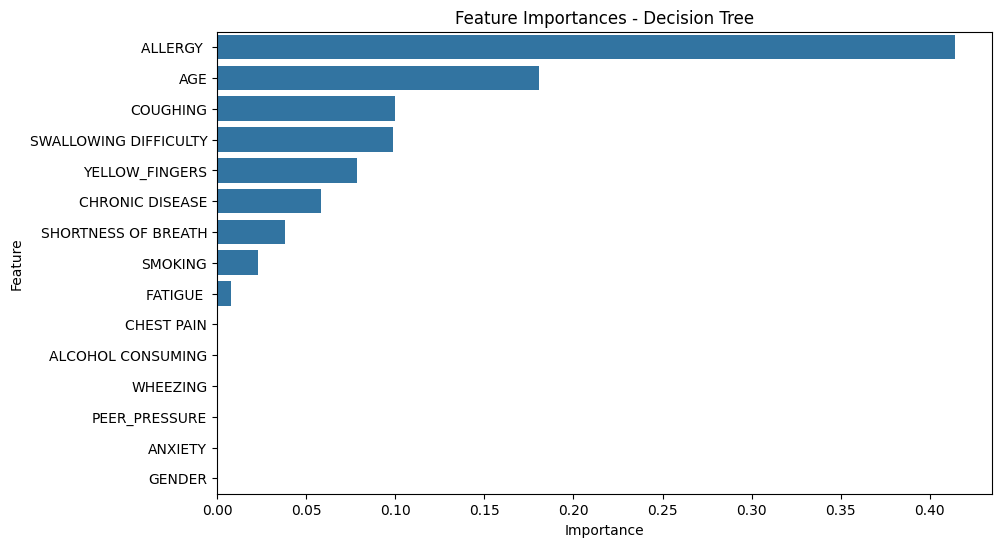

In [71]:
# Get feature importances for Decision Tree
feature_importances_dt = dt_model.feature_importances_
sorted_indices_dt = np.argsort(feature_importances_dt)[::-1]
sorted_features_dt = X.columns[sorted_indices_dt]
sorted_importances_dt = feature_importances_dt[sorted_indices_dt]

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_dt, y=sorted_features_dt)
plt.title('Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [72]:
# Initialize PCA and fit-transform the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

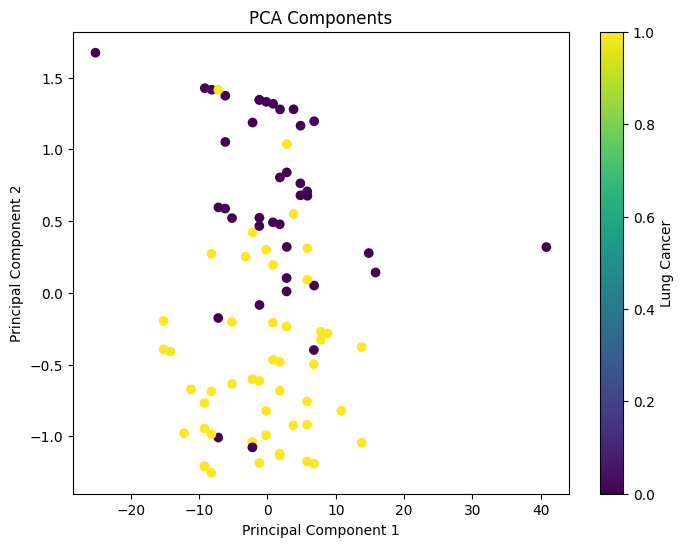

In [73]:
# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Lung Cancer')
plt.show()

In [74]:
# Classification Report for each model
models = [
    ("Random Forest", rf_model),
    ("Logistic Regression", lr_model),
    ("Decision Tree", dt_model),
    ("gradient boosting model", gbc_model)
    #("Support Vector Machine", svm_model)
]

In [75]:
for name, model in models:
    print(f"\n{name} Model:")
    print("Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.89      0.85      0.87        20

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.89      0.85      0.87        20

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


Decision Tree Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.80      0.80      0.80        20

    accuracy                           0.

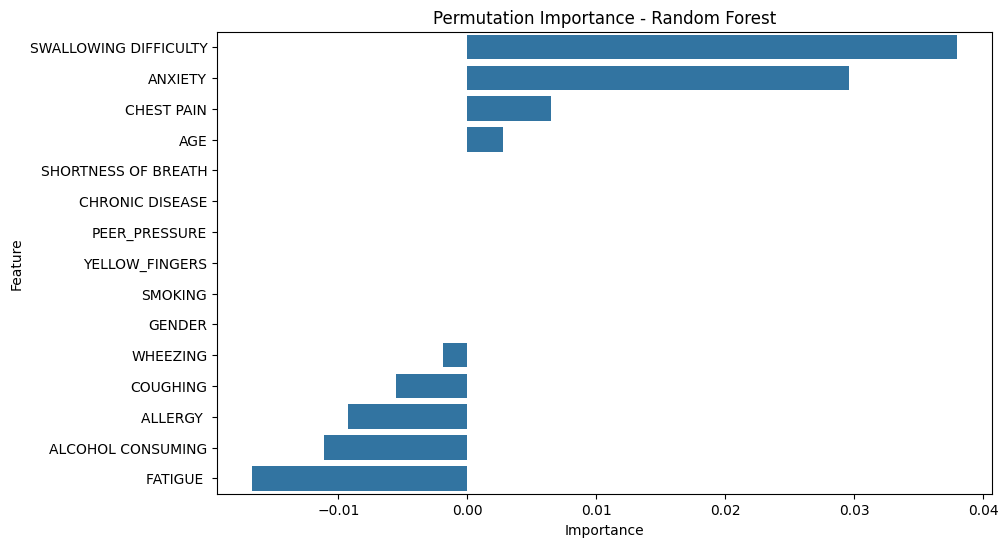

In [76]:
# Calculate permutation importance for Random Forest
rf_perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_rf_perm = np.argsort(rf_perm_importance.importances_mean)[::-1]
sorted_features_rf_perm = X.columns[sorted_indices_rf_perm]
sorted_importances_rf_perm = rf_perm_importance.importances_mean[sorted_indices_rf_perm]

# Plot permutation importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf_perm, y=sorted_features_rf_perm)
plt.title('Permutation Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

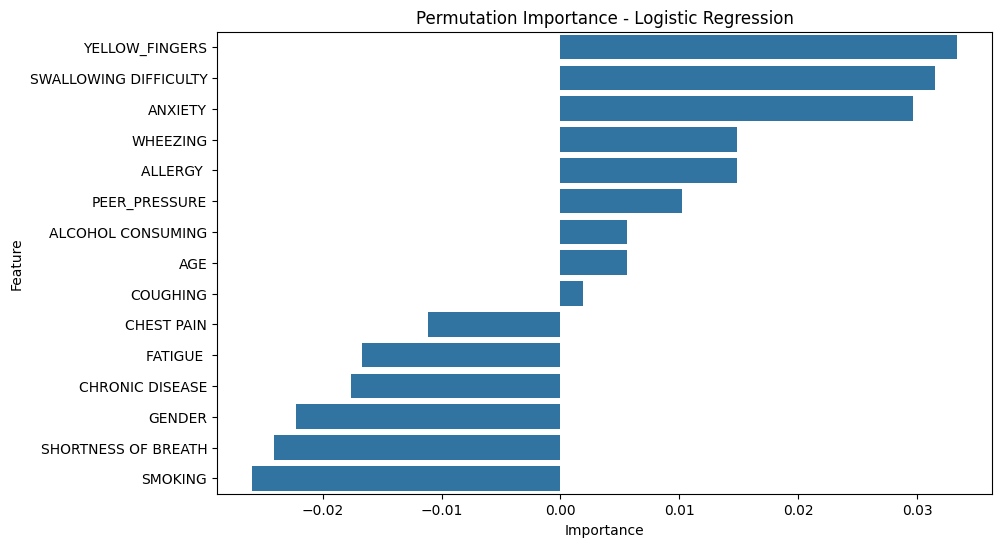

In [77]:
# Calculate permutation importance for Logistic Regression
lr_perm_importance = permutation_importance(lr_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_lr_perm = np.argsort(lr_perm_importance.importances_mean)[::-1]
sorted_features_lr_perm = X.columns[sorted_indices_lr_perm]
sorted_importances_lr_perm = lr_perm_importance.importances_mean[sorted_indices_lr_perm]

# Plot permutation importance for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_lr_perm, y=sorted_features_lr_perm)
plt.title('Permutation Importance - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

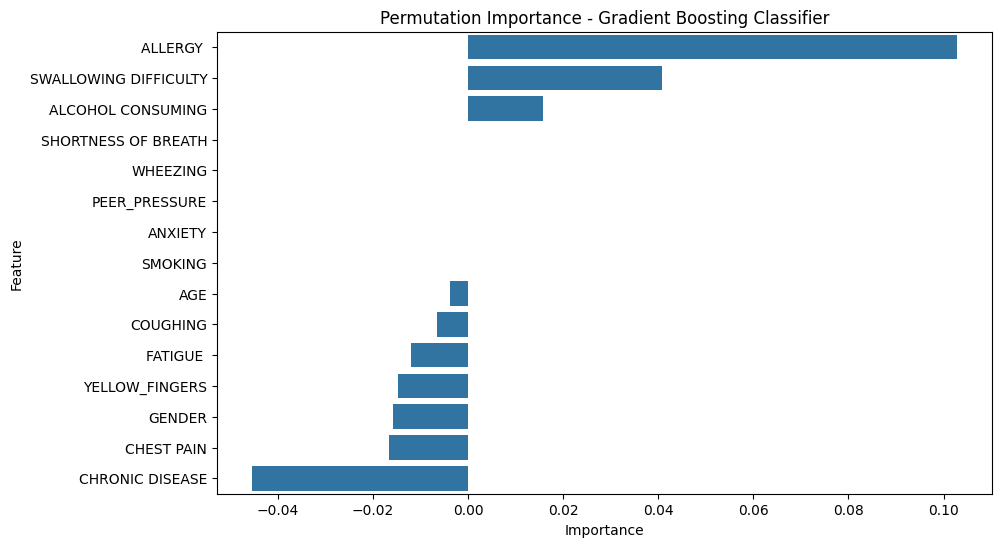

In [78]:
# Calculate permutation importance for Gradient Boosting Classifier
gbc_perm_importance = permutation_importance(gbc_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_gbc_perm = np.argsort(gbc_perm_importance.importances_mean)[::-1]
sorted_features_gbc_perm = X.columns[sorted_indices_gbc_perm]
sorted_importances_gbc_perm = gbc_perm_importance.importances_mean[sorted_indices_gbc_perm]

# Plot permutation importance for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_gbc_perm, y=sorted_features_gbc_perm)
plt.title('Permutation Importance - Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


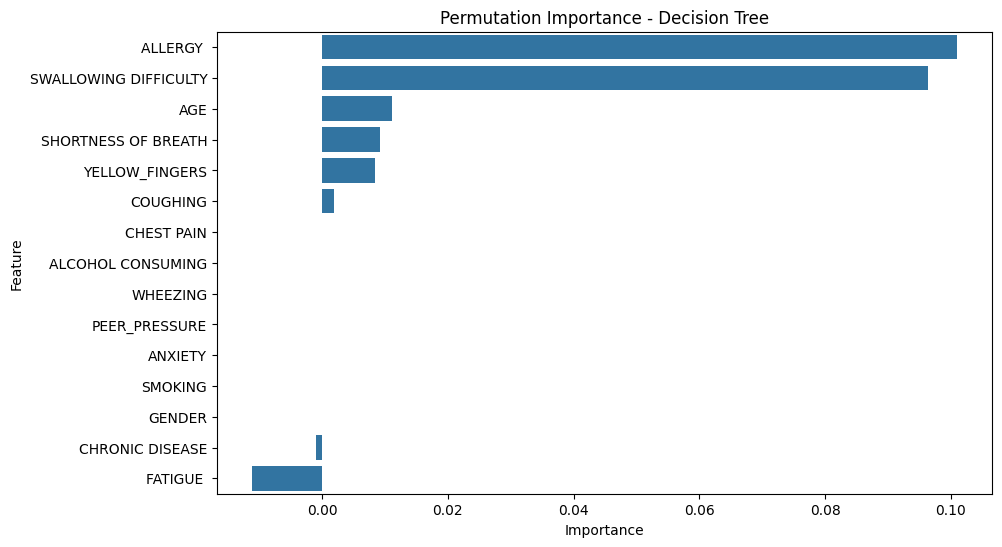

In [79]:
# Calculate permutation importance for Decision Tree
dt_perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_dt_perm = np.argsort(dt_perm_importance.importances_mean)[::-1]
sorted_features_dt_perm = X.columns[sorted_indices_dt_perm]
sorted_importances_dt_perm = dt_perm_importance.importances_mean[sorted_indices_dt_perm]

# Plot permutation importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_dt_perm, y=sorted_features_dt_perm)
plt.title('Permutation Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [80]:
# Confusion Matrices for all four models
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
lr_cm = confusion_matrix(y_test, lr_model.predict(X_test))
#svm_cm = confusion_matrix(y_test, svm_model.predict(X_test))
gbc_cm = confusion_matrix(y_test, gbc_model.predict(X_test))
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))

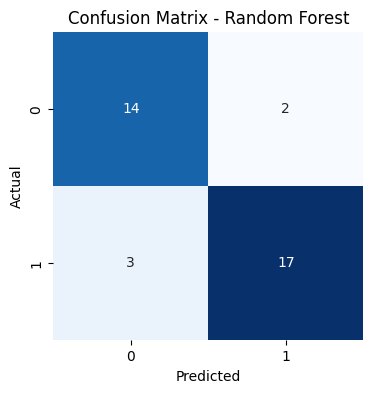

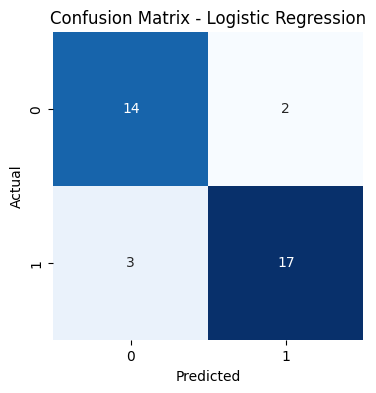

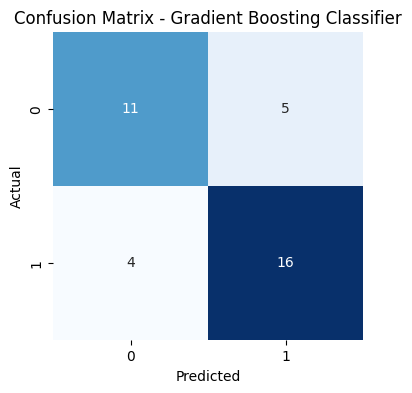

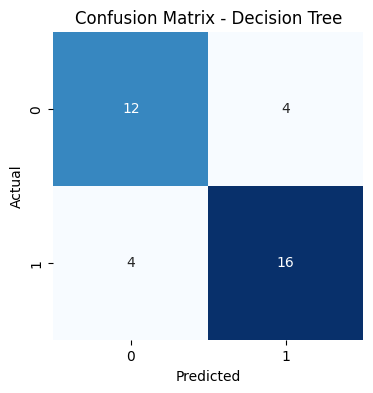

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all four models
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(lr_cm, 'Logistic Regression')
plot_confusion_matrix(gbc_cm, 'Gradient Boosting Classifier')
plot_confusion_matrix(dt_cm, 'Decision Tree')


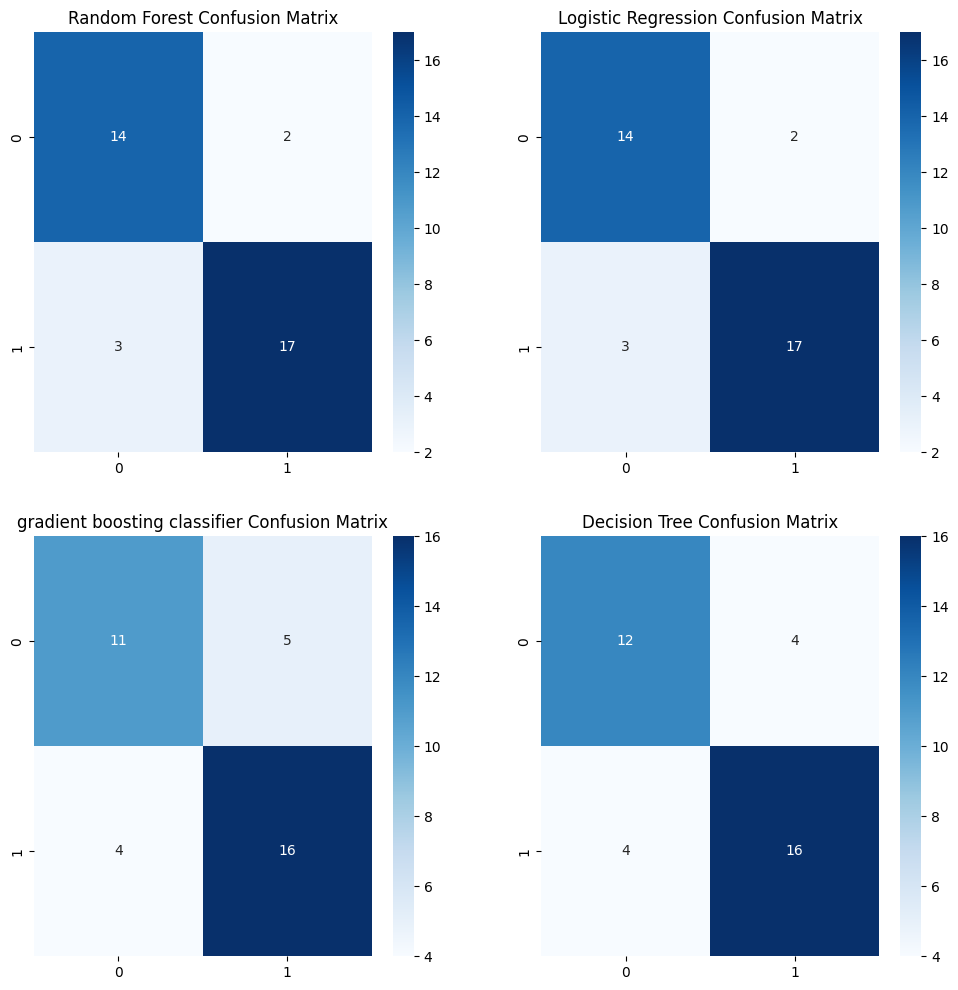

In [82]:
# Plot Confusion Matrices
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', ax=ax[0, 0])
ax[0, 0].set_title('Random Forest Confusion Matrix')
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', ax=ax[0, 1])
ax[0, 1].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(gbc_cm, annot=True, cmap='Blues', fmt='d', ax=ax[1, 0])
ax[1, 0].set_title('gradient boosting classifier Confusion Matrix')
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', ax=ax[1, 1])
ax[1, 1].set_title('Decision Tree Confusion Matrix')

plt.show()

In [83]:
# Calculate False Negatives Percentage for all models
false_negatives_rf = rf_cm[1, 0]  # Random Forest
total_actual_positives_rf = rf_cm[1, 0] + rf_cm[1, 1]

false_negatives_lr = lr_cm[1, 0]  # Logistic Regression
total_actual_positives_lr = lr_cm[1, 0] + lr_cm[1, 1]

false_negatives_svm = gbc_cm[1, 0]  # gradient boosting classifier
total_actual_positives_svm = gbc_cm[1, 0] + gbc_cm[1, 1]

false_negatives_dt = dt_cm[1, 0]  # decision tree
total_actual_positives_dt = dt_cm[1, 0] + dt_cm[1, 1]

In [84]:
false_negatives_percentage_rf = (false_negatives_rf / total_actual_positives_rf) * 100
false_negatives_percentage_lr = (false_negatives_lr / total_actual_positives_lr) * 100
false_negatives_percentage_gbc = (false_negatives_gbc / total_actual_positives_gbc) * 100
false_negatives_percentage_dt = (false_negatives_dt / total_actual_positives_dt) * 100

In [85]:
print(f"False Negatives Percentage for Random Forest: {false_negatives_percentage_rf:.2f}%")
print(f"False Negatives Percentage for Logistic Regression: {false_negatives_percentage_lr:.2f}%")
print(f"False Negatives Percentage for gradient boosting: {false_negatives_percentage_gbc:.2f}%")
print(f"False Negatives Percentage for Decision Tree: {false_negatives_percentage_dt:.2f}%")

False Negatives Percentage for Random Forest: 15.00%
False Negatives Percentage for Logistic Regression: 15.00%
False Negatives Percentage for gradient boosting: 3.54%
False Negatives Percentage for Decision Tree: 20.00%


In [86]:
# Save the trained logistic regression model to a file
with open('lung_cancer_lr_balanced.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
